<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/mountain/art1131.jpg)|![](./data/forest/cdmc317.jpg)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be sometime that can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still).

**btw, you could use a new variable name if you don't want to keep it "x"**

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

In [81]:
import numpy as np
import random
import sys
import os
from skimage import color, io
from PIL import Image

In [13]:
data0_files = os.listdir('./data/forest')
data1_files = os.listdir('./data/mountain')

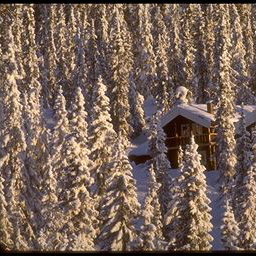

In [107]:
Image.open('./data/forest/art114.jpg')

In [122]:
for filename in data0_files:
    Image.open(f'./data/forest/{filename}')

FileNotFoundError: [Errno 2] No such file or directory: './data/forest/n603032.jpg'

In [21]:
len(io.imread('./data/forest/art114.jpg'))

256

In [25]:
for file in data1_files[:3]:
    print(file)

natu440.jpg
text29.jpg
land726.jpg


In [52]:
data0 = []
data1 = []
            
for file in data1_files:
    if file[-3:] == 'jpg':
        data1.append(io.imread(f'./data/forest/{file}'))

for file in data0_files:
    if file[-3:] == 'jpg':
        data0.append(io.imread(f'./data/mountain/{file}'))
        
print(len(data0),len(data1))

374 328


In [32]:
len(data1)

328

In [33]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [37]:
train_images.shape

(50000, 32, 32, 3)

In [53]:
forest_labels = np.zeros(len(data0))

In [54]:
mountain_labels = np.ones(len(data1))

In [55]:
len(forest_labels),len(mountain_labels)

(374, 328)

In [59]:
len(np.concatenate((data0, data1), axis=0))

702

In [87]:
len(data0)

374

In [113]:
images = np.concatenate((data0, data1), axis=0)

In [114]:
labels = np.concatenate((forest_labels, mountain_labels), axis=0)

In [88]:
images.shape

(702, 256, 256, 3)

In [64]:
len(images)

702

In [65]:
len(labels)

702

## Instatiate Model

In [115]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [116]:
for layer in resnet.layers:
    layer.trainable = False

In [117]:
x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

In [118]:
# Compile Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [119]:
images.shape

(702, 256, 256, 3)

## Fit Model

In [120]:
# Fit Model
model.fit(images, labels, epochs=10)

Epoch 1/10
702/702 [==============================] - 39s 55ms/sample - loss: 0.2505 - acc: 0.9345
Epoch 2/10
702/702 [==============================] - 35s 50ms/sample - loss: 0.0432 - acc: 0.9843
Epoch 3/10
702/702 [==============================] - 35s 49ms/sample - loss: 0.0279 - acc: 0.9858
Epoch 4/10
702/702 [==============================] - 35s 50ms/sample - loss: 0.0166 - acc: 0.9929
Epoch 5/10
702/702 [==============================] - 35s 50ms/sample - loss: 0.0121 - acc: 0.9943
Epoch 6/10
702/702 [==============================] - 35s 49ms/sample - loss: 0.0070 - acc: 0.9972
Epoch 7/10
702/702 [==============================] - 37s 52ms/sample - loss: 0.0045 - acc: 0.9986
Epoch 8/10
702/702 [==============================] - 35s 50ms/sample - loss: 0.0018 - acc: 1.0000
Epoch 9/10
702/702 [==============================] - 35s 50ms/sample - loss: 0.0028 - acc: 0.9986
Epoch 10/10
702/702 [==============================] - 35s 50ms/sample - loss: 8.2426e-04 - acc: 1.0000


In [121]:
model.evaluate(images, labels)

702/702 [==============================] - 37s 53ms/sample - loss: 0.0277 - acc: 0.9929


[0.02774271455338355, 0.9928775]

In [95]:
# train_images = images / 255

In [99]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_images = preprocess_input(images)

In [100]:
# Fit Model
model.fit(train_images, labels, epochs=10)

Epoch 1/10
702/702 [==============================] - 35s 50ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 2/10
702/702 [==============================] - 35s 49ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 3/10
702/702 [==============================] - 35s 49ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 4/10
702/702 [==============================] - 35s 50ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 5/10
702/702 [==============================] - 36s 52ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 6/10
702/702 [==============================] - 35s 49ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 7/10
702/702 [==============================] - 35s 49ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 8/10
702/702 [==============================] - 35s 50ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 9/10
702/702 [==============================] - 35s 50ms/sample - loss: 7.5310 - acc: 0.5328
Epoch 10/10
702/702 [==============================] - 36s 51ms/sample - loss: 7.5310 - acc: 0.5328


In [105]:
model.evaluate(images,labels)

702/702 [==============================] - 37s 52ms/sample - loss: 7.5268 - acc: 0.5328


[7.526760498003399, 0.53276354]

# Custom CNN Model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 215, 215, 32)      9632      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [96]:
# Compile Model


In [99]:
# Fit Model


Train on 561 samples, validate on 141 samples
Epoch 1/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.2667 - accuracy: 0.9073 - val_loss: 0.1186 - val_accuracy: 0.9858
Epoch 2/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.2046 - accuracy: 0.9073 - val_loss: 0.3342 - val_accuracy: 0.8511
Epoch 3/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1778 - accuracy: 0.9287 - val_loss: 0.2746 - val_accuracy: 0.8723
Epoch 4/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1681 - accuracy: 0.9323 - val_loss: 0.8487 - val_accuracy: 0.5957
Epoch 5/5
561/561 [==============================] - 18s 32ms/sample - loss: 0.1606 - accuracy: 0.9394 - val_loss: 0.3903 - val_accuracy: 0.8582


# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language